In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import millikan.Dataloader as dl
from millikan.Analysis import *
from millikan.functions import *
import pandas as pd

In [2]:


df = dl.main_dataframe("/home/lucas/repos/advanced_exp/Databases/BBL_Master_Drops.csv", "/home/lucas/repos/advanced_exp/Databases/BBL_Voltage_Resistance.csv")
display(df)

Droplet found without enough values


,v_rise,sigma_v_rise,v_fall,sigma_v_fall,Volts,sigma_Volts,resistance,Temperature,pressure,spacing,sigma_spacing,Efield,sigma_Efield,viscosity,sigma_viscosity,q,sigma_q
drop 1,0.082714,0.009998,0.075353,0.007840,545.50,0.50,2.4740,293,101325,0.03,0.001,18183.333333,606.340215,0.000018,0.0,2.567346e-16,3.190151e-17
drop 2,0.002500,0.004761,0.053071,0.017570,545.50,0.50,2.4740,293,101325,0.03,0.001,18183.333333,606.340215,0.000018,0.0,7.574858e-17,3.714763e-17
drop 3,0.056250,0.004870,0.065222,0.017140,545.50,0.50,2.4740,293,101325,0.03,0.001,18183.333333,606.340215,0.000018,0.0,1.835555e-16,5.092611e-17
drop 4,0.110750,0.139546,0.041250,0.002563,545.50,0.50,2.4740,293,101325,0.03,0.001,18183.333333,606.340215,0.000018,0.0,1.826620e-16,1.680342e-16
drop 5,0.158333,0.052764,0.094737,0.016067,545.50,0.50,2.4740,293,101325,0.03,0.001,18183.333333,606.340215,0.000018,0.0,4.608854e-16,1.189146e-16
drop 6,0.103000,0.035553,0.027517,0.010207,545.50,0.50,2.4740,293,101325,0.03,0.001,18183.333333,606.340215,0.000018,0.0,1.281041e-16,4.875218e-17
drop 7,0.123125,0.034566,0.096364,0.017624,545.50,0.50,2.4740,293,101325,0.03,0.001,18183.333333,606.340215,0.000018,0.0,4.031449e-16,9.489671e-17
drop 8,0.133333,0.067370,0.020667,0.007355,540.50,1.50,2.4545,293,101325,0.03,0.001,18016.666667,602.633367,0.000018,0.0,1.322049e-16,6.522885e-17
drop 9,0.037617,0.009624,0.121393,0.018279,540.50,1.50,2.4545,293,101325,0.03,0.001,18016.666667,602.633367,0.000018,0.0,3.308365e-16,6.696736e-17
drop 10,0.092000,0.036442,0.037437,0.005162,540.50,1.50,2.4545,293,101325,0.03,0.001,18016.666667,602.633367,0.000018,0.0,1.495564e-16,4.541865e-17


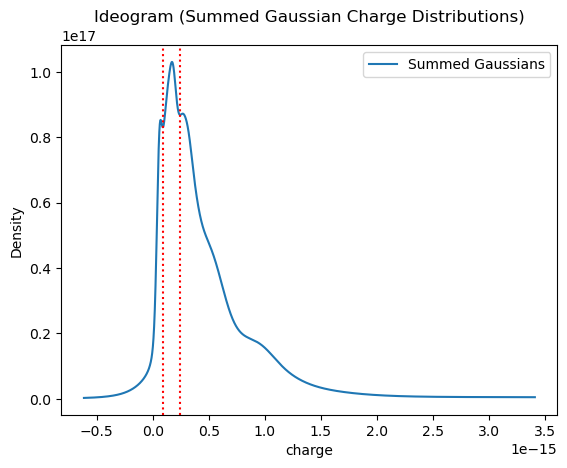

array([9.02085938e-17, 2.44814385e-16])

In [3]:
q, sigma_q = df["q"].to_numpy(), df["sigma_q"].to_numpy()
ideogram(q, sigma_q)

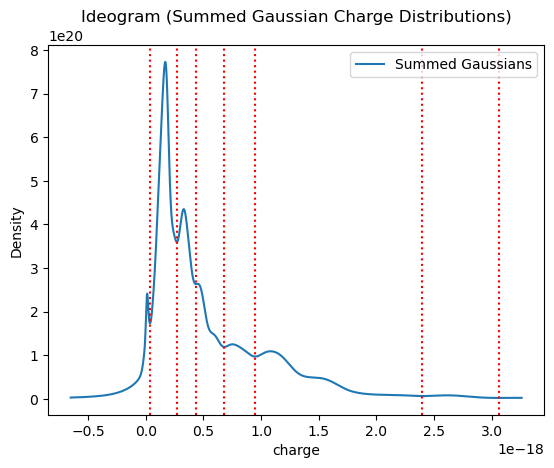

[3.63250981e-20 2.69102594e-19 4.35372234e-19 6.81451301e-19
 9.49047616e-19 2.39852765e-18 3.06438866e-18]


In [11]:
class_q, class_sigma_q = dl.load_class_charges("/home/lucas/repos/advanced_exp/Databases/combined_droplets_data.csv")
min_x = ideogram(class_q, 1.5*class_sigma_q)
#min_x = np.delete(min_x, 7)
print(min_x)

   bin   mean_charge    sigma_mean
0  0.0  1.593046e-19  2.293525e-21
1  1.0  3.396201e-19  3.937010e-21
2  2.0  5.214588e-19  5.760760e-21
3  3.0  7.954305e-19  8.075697e-21
4  4.0  1.227974e-18  7.787519e-21
5  5.0  2.628465e-18  6.595920e-20
   bin   mean_charge    sigma_mean
0  0.0  1.593046e-19  2.293525e-21
1  1.0  3.396201e-19  3.937010e-21
2  2.0  5.214588e-19  5.760760e-21
3  3.0  7.954305e-19  8.075697e-21
4  4.0  1.227974e-18  7.787519e-21
5  5.0  2.628465e-18  6.595920e-20
Slope: 2.370e-19 ± 1.554e-21
Intercept: 1.407e-19 ± 2.126e-21


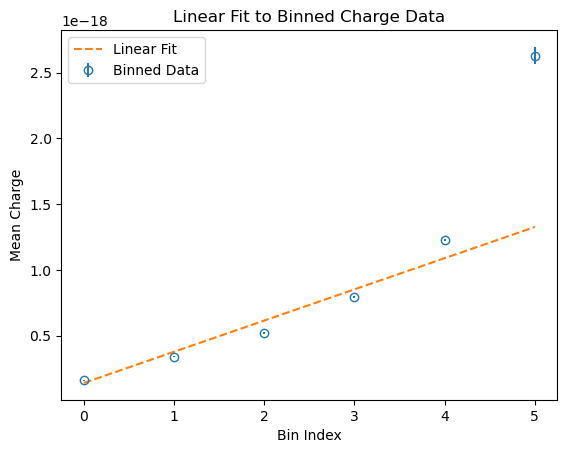

In [13]:
binned_df = bin_charges(class_q, class_sigma_q, min_x)
bin_means = weighted_average(binned_df)
print(bin_means)
bin_means_trim = bin_means.iloc[:]
print(bin_means_trim)
slope, intercept, slope_error, intercept_error = linear_fit(bin_means_trim)

# Print results
print(f"Slope: {slope:.3e} ± {slope_error:.3e}")
print(f"Intercept: {intercept:.3e} ± {intercept_error:.3e}")

# Plot the results
plot_binned_data(bin_means_trim, slope, intercept)